# Scikit-Learn machine learning package


The [scikit-learn homepage](https://scikit-learn.org) has detailed documentation on various machine learning algorithms.

Strengths:
- Comprehensive coverage of ML algorithms.
- Simple tools for getting started with any algorithm
- Clear description of function arguments (API)

Weaknesses:
- Not a lot of details about the algorithms themselves or what to use when
- Not as powerful as some other ML libraries that are optimized for performance in DNNs

# Simple Decision Tree

The DecisionTreeClassifier is fully implemented in scikit-learn.
There is no need to define tree structure or stopping point.

#

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn import datasets # import inbuild datasets

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

For this example we will use the standard iris dataset for machine learning.
The data points have measurements of iris parameters, and labels of iris species.

In [6]:
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Starting today, we will pay more attention to the division between the *training data* and the *testing data*.
We evaluate the performance on the testing data to avoid overfitting on the training data.
There is no optimal split between training and testing, but the testing data should be large enough that the results are not dominated by statistical variance (limited statistics).

In [ ]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
score=[]
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [4]:
dtclassifier.score(X_train, y_train),dtclassifier.score(X_test, y_test)

(1.0, 0.9555555555555556)

The results on the training data are perfect!
The results on the testing data are almost perfect.

Now let us see what the simple decision tree looks like.
(Remind yourself what a gini score of 0.0 means.)

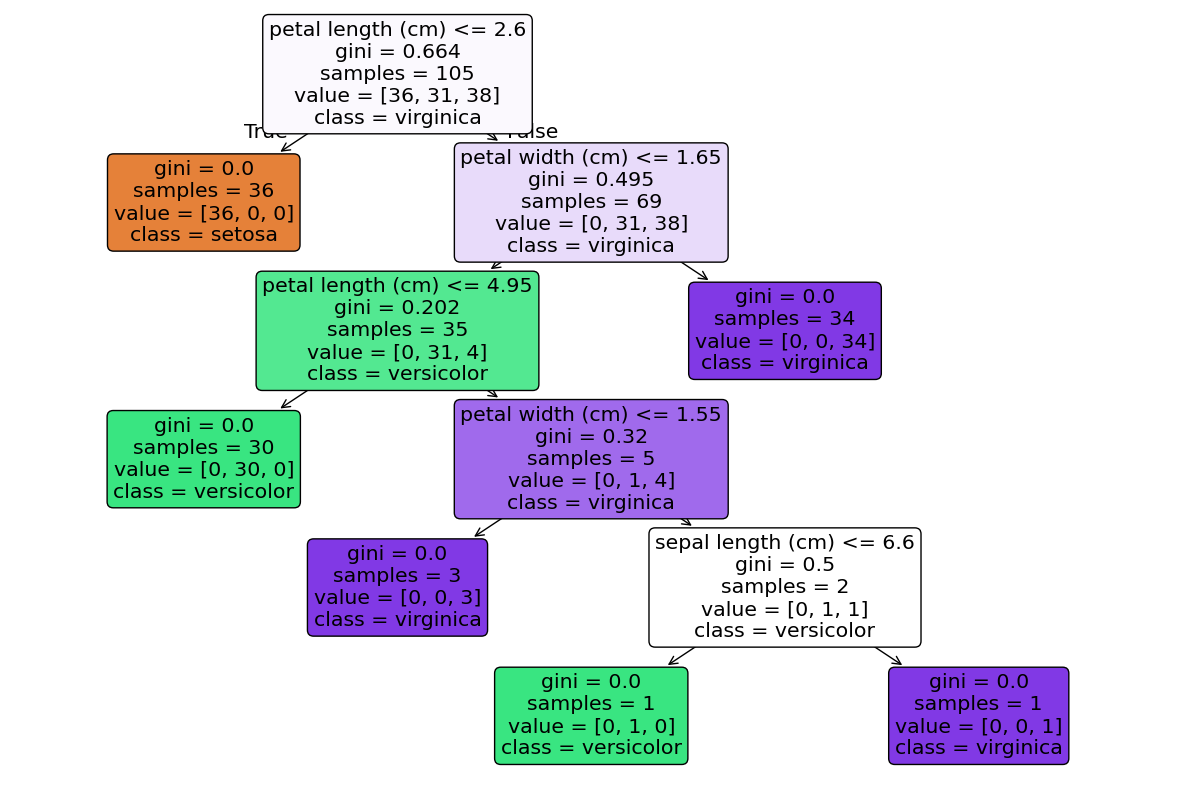

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtclassifier,
          feature_names=iris['feature_names'],
          class_names=iris['target_names'],
          filled=True,
          rounded=True)
plt.show()

## Bagging (Boosted Aggregation)

To do the bagging, we need to do the trees first.
They show up as a "random forest" of trees.

In [8]:
rfclassifier = RandomForestClassifier(n_estimators=100)
bag_clf = BaggingClassifier(estimator=rfclassifier, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100,
                  n_jobs=-1, random_state=42)

In [9]:
bag_clf.score(X_train,y_train),bag_clf.score(X_test,y_test)

(1.0, 0.9555555555555556)

## Example of XGBoost

Extreme Gradient Boosting

In [18]:
from xgboost import XGBClassifier
import xgboost
xgbclf = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
xgbclf.fit(X_train, y_train)
# make predictions
preds = xgbclf.predict(X_test)

In [19]:
print(preds)

[1 0 2 0 0 2 0 1 1 2 0 2 0 1 2 1 2 2 1 1 0 0 0 2 2 0 0 0 2 1 2 1 0 1 0 1 1
 1 2 1 1 2 0 1 2]


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Axes: >

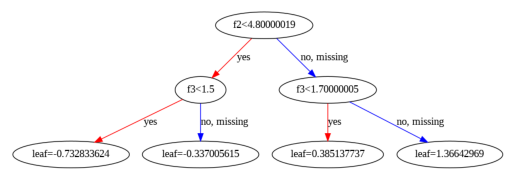

In [24]:
xgboost.plot_tree(xgbclf, num_trees=2)
